<a href="https://colab.research.google.com/github/Mostaq27/Data_processing_And_Plotting/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 2. Imports + read CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The uploaded file name (change if different)
df = pd.read_csv('crop_recommendation (2).csv')

print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Loaded 2,200 rows × 8 columns


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# 3. Clean & process data

# Ensure all columns are numeric except 'label'
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with any NaN values (if any)
df.dropna(inplace=True)

# Unique crops
print("Unique crops:", df['label'].unique())
print("Number of samples per crop:", df['label'].value_counts().to_dict())

df.head()

Unique crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Number of samples per crop: {'rice': 100, 'maize': 100, 'chickpea': 100, 'kidneybeans': 100, 'pigeonpeas': 100, 'mothbeans': 100, 'mungbean': 100, 'blackgram': 100, 'lentil': 100, 'pomegranate': 100, 'banana': 100, 'mango': 100, 'grapes': 100, 'watermelon': 100, 'muskmelon': 100, 'apple': 100, 'orange': 100, 'papaya': 100, 'coconut': 100, 'cotton': 100, 'jute': 100, 'coffee': 100}


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.945536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# 4. Summary stats

df.describe().round(2)

,N,P,K,temperature,humidity,ph,rainfall
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00
mean,50.55,53.36,48.15,25.62,71.48,6.47,103.46
std,36.92,32.99,50.65,5.06,22.26,0.77,54.96
min,0.00,5.00,5.00,8.83,14.26,3.50,20.21
25%,21.00,28.00,20.00,22.77,60.26,5.97,64.55
50%,37.00,51.00,32.00,25.60,80.47,6.43,94.87
75%,84.25,68.00,49.00,28.56,89.95,6.92,124.27
max,140.00,145.00,205.00,43.68,99.98,9.94,298.56


In [6]:
# 5. Aggregates: Mean features by Crop

crop_means = df.groupby('label')[numeric_cols].mean().reset_index()

# Correlation matrix for features
corr_matrix = df[numeric_cols].corr()

crop_means.head()

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646


/tmp/ipython-input-3265763232.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='temperature', palette='coolwarm')


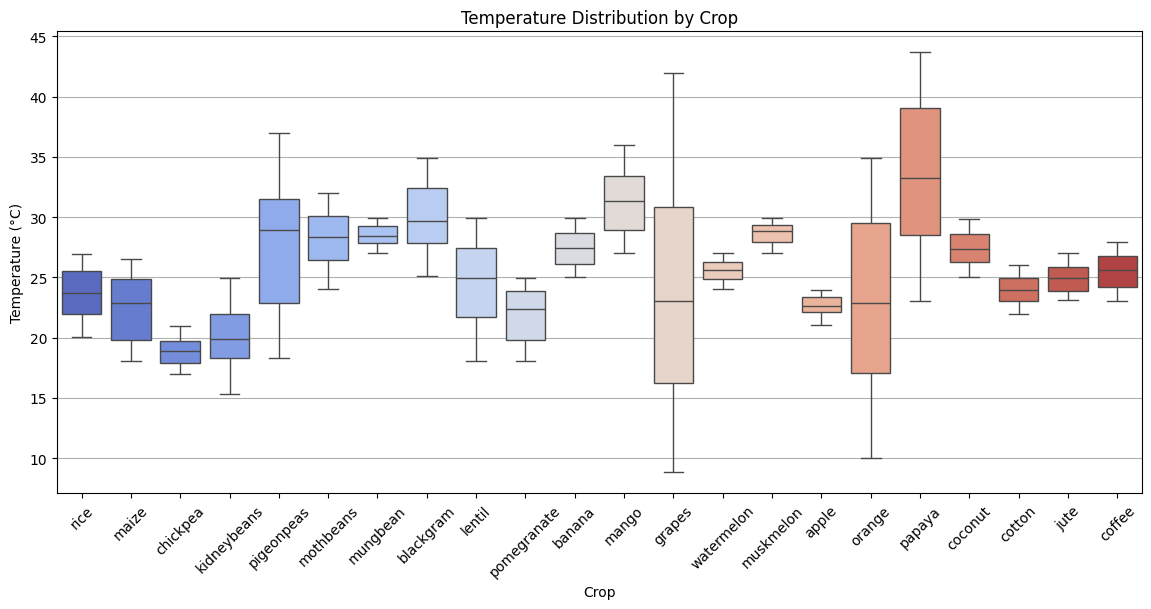

In [7]:
# 6. Plot - Boxplot: Temperature by Crop

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='label', y='temperature', palette='coolwarm')
plt.title('Temperature Distribution by Crop')
plt.xlabel('Crop')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-1642802903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='rainfall', palette='Blues')


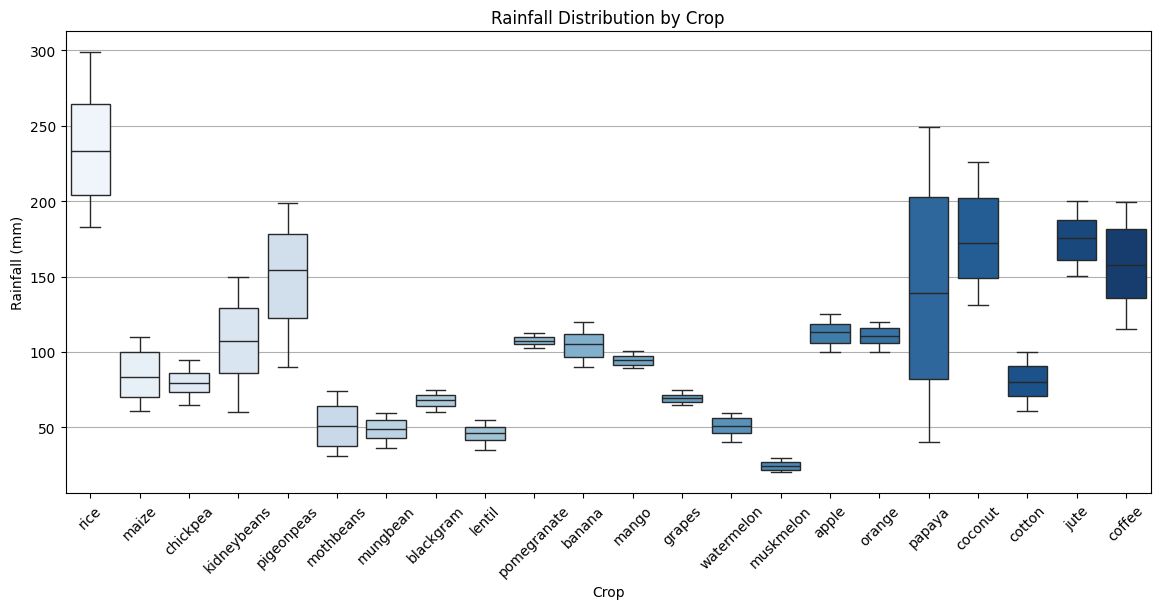

In [8]:
# 7. Plot - Boxplot: Rainfall by Crop

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='label', y='rainfall', palette='Blues')
plt.title('Rainfall Distribution by Crop')
plt.xlabel('Crop')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

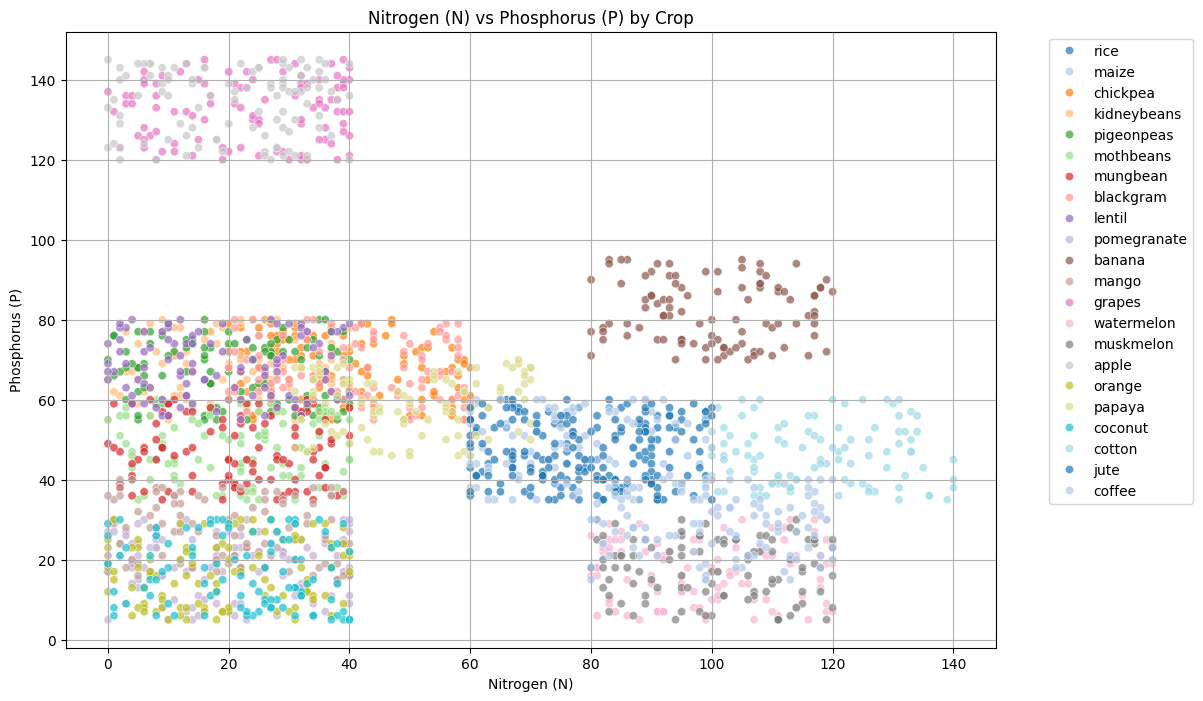

In [9]:
# 8. Plot - Scatter: N vs P (colored by Crop)

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='N', y='P', hue='label', palette='tab20', alpha=0.7)
plt.title('Nitrogen (N) vs Phosphorus (P) by Crop')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Phosphorus (P)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

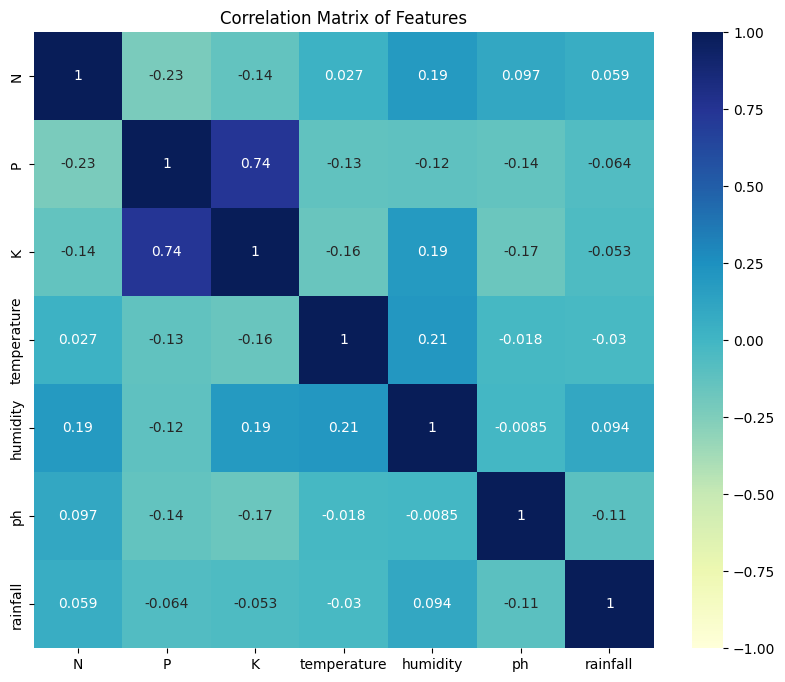

In [10]:
# 9. Plot - Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

/tmp/ipython-input-1690285926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crop_means, x='label', y='rainfall', palette='viridis')


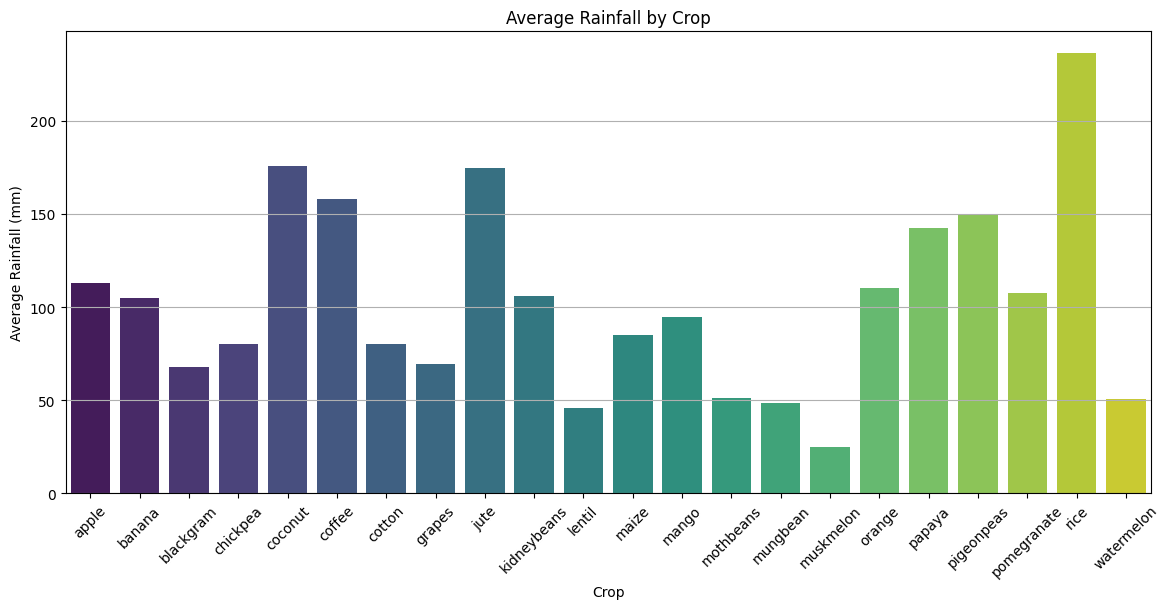

In [11]:
# 10. Plot - Mean Features by Crop (Bar plot for Rainfall)

plt.figure(figsize=(14,6))
sns.barplot(data=crop_means, x='label', y='rainfall', palette='viridis')
plt.title('Average Rainfall by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [13]:
# 11. (Optional) Save Processed Data

from google.colab import files

df.to_csv('crop_recommendation_cleaned.csv', index=False)
files.download('crop_recommendation_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>